In [1]:
import os
import time
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data_directory = '/Users/Reynard/dropbox/Data/kaggle/Personalized Medicine'

In [3]:
train_variants = pd.read_csv(data_directory + "/input/training_variants")
test_variants = pd.read_csv(data_directory + "/input/test_variants")
train_text = pd.read_csv(data_directory + "/input/training_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
test_text = pd.read_csv(data_directory + "/input/test_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

In [4]:
train = pd.merge(train_variants, train_text, how='left', on='ID')
y_train = train['Class'].values
X_train = train.drop('Class', axis=1)

In [5]:
X_test = pd.merge(test_variants, test_text, how='left', on='ID')
test_index = X_test['ID'].values

In [6]:
sentences_train = X_train['Text']
sentences_train.shape
sentences_train.head()

0    Cyclin-dependent kinases (CDKs) regulate a var...
1     Abstract Background  Non-small cell lung canc...
2     Abstract Background  Non-small cell lung canc...
3    Recent evidence has demonstrated that acquired...
4    Oncogenic mutations in the monomeric Casitas B...
Name: Text, dtype: object

In [7]:
sentences_test = X_test['Text']
sentences_test.shape
sentences_test.head()

0    2. This mutation resulted in a myeloproliferat...
1     Abstract The Large Tumor Suppressor 1 (LATS1)...
2    Vascular endothelial growth factor receptor (V...
3    Inflammatory myofibroblastic tumor (IMT) is a ...
4     Abstract Retinoblastoma is a pediatric retina...
Name: Text, dtype: object

In [8]:
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf.fit_transform(sentences_train)
tfidf_test = tfidf.transform(sentences_test)

In [9]:
svd = TruncatedSVD(400, algorithm='arpack')
svd_train = svd.fit_transform(tfidf_train)
svd_test = svd.transform(tfidf_test)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [11]:
svd_train.shape

(3321, 400)

In [12]:
input_shape = svd_train.shape[1]
output_shape = len(train['Class'].unique())
batch_n = 32

In [13]:
def model_hypothesis():
    model = Sequential()
    model.add(Dense(512, input_dim=input_shape, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(output_shape, kernel_initializer='normal', activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_enc = encoder.transform(y_train)

In [15]:
y_ind = np_utils.to_categorical(y_enc)

In [16]:
estimator = KerasClassifier(build_fn=model_hypothesis, epochs=1000, batch_size=batch_n)
estimator.fit(svd_train, y_ind, validation_split=0.05)

Train on 3154 samples, validate on 167 samples
Epoch 1/100
3154/3154 [==============================] - 1s - loss: 1.8897 - acc: 0.2796 - val_loss: 1.7134 - val_acc: 0.4012
Epoch 2/100
3154/3154 [==============================] - 1s - loss: 1.7063 - acc: 0.3253 - val_loss: 1.6685 - val_acc: 0.3054
Epoch 3/100
3154/3154 [==============================] - 1s - loss: 1.5125 - acc: 0.4103 - val_loss: 1.6483 - val_acc: 0.3832
Epoch 4/100
3154/3154 [==============================] - 1s - loss: 1.4075 - acc: 0.4620 - val_loss: 1.6701 - val_acc: 0.3892
Epoch 5/100
3154/3154 [==============================] - 1s - loss: 1.3014 - acc: 0.5016 - val_loss: 1.7008 - val_acc: 0.4371
Epoch 6/100
3154/3154 [==============================] - 1s - loss: 1.2689 - acc: 0.5060 - val_loss: 1.7509 - val_acc: 0.3832
Epoch 7/100
3154/3154 [==============================] - 1s - loss: 1.2178 - acc: 0.5289 - val_loss: 1.7578 - val_acc: 0.4311
Epoch 8/100
3154/3154 [==============================] - 1s - loss: 1.1

3154/3154 [==============================] - 1s - loss: 0.7529 - acc: 0.7238 - val_loss: 2.2622 - val_acc: 0.3473
Epoch 66/100
3154/3154 [==============================] - 0s - loss: 0.7413 - acc: 0.7318 - val_loss: 2.4712 - val_acc: 0.3713
Epoch 67/100
3154/3154 [==============================] - 0s - loss: 0.7411 - acc: 0.7280 - val_loss: 2.3469 - val_acc: 0.3293
Epoch 68/100
3154/3154 [==============================] - 1s - loss: 0.7475 - acc: 0.7181 - val_loss: 2.3362 - val_acc: 0.3772
Epoch 69/100
3154/3154 [==============================] - 0s - loss: 0.7542 - acc: 0.7210 - val_loss: 2.4424 - val_acc: 0.3653
Epoch 70/100
3154/3154 [==============================] - 1s - loss: 0.7287 - acc: 0.7372 - val_loss: 2.3821 - val_acc: 0.3653
Epoch 71/100
3154/3154 [==============================] - 1s - loss: 0.7555 - acc: 0.7273 - val_loss: 2.4144 - val_acc: 0.3713
Epoch 72/100
3154/3154 [==============================] - 1s - loss: 0.7615 - acc: 0.7235 - val_loss: 2.4452 - val_acc: 0.37

In [20]:
from keras.utils import plot_model
plot_model(model_hypothesis(), to_file='model_hypothesis1.png')

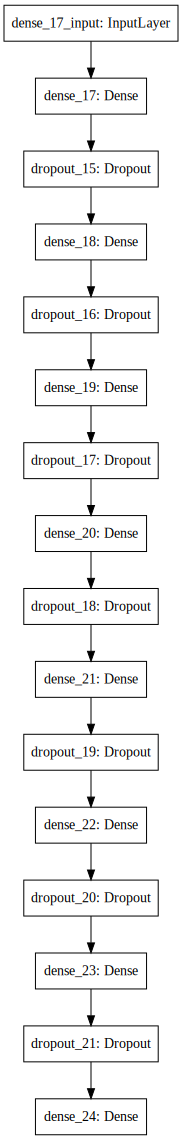

In [22]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model_hypothesis()).create(prog='dot', format='svg'))

In [23]:
y_pred = estimator.predict_proba(svd_test)

5280/5668 [==========================>...] - ETA: 0s

In [ ]:
submission = pd.DataFrame(y_pred)
submission['id'] = test_index
submission.columns = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'id']
submission.to_csv(directory + "/output/my_submission.csv",index=False)